In [1]:
import sys
import os


SCRIPT_PATH = os.path.join(os.path.abspath(os.path.dirname('../__file__')), 'script')
sys.path.insert(0, SCRIPT_PATH)

from simon_device import *
import matplotlib.pyplot as plt
import seaborn as sns

sns.set(font_scale=2, rc={'lines.linewidth':5})
sns.set_style('white')

ACT-R connection has been started.


## Cost Function

After explore several cost functions, I picked appropriate a,b constant. You can visualize cost function here

In [2]:
%%html

<iframe src="https://www.desmos.com/calculator/i0vhxara1a?embed" width="800" height="500" style="border: 1px solid #ccc" frameborder=10></iframe>

In [12]:

df_bokesem_fatigue = pd.DataFrame({
    'interval': [1, 2, 3, 4, 5, 6, 7],
    'response_time': [457, 463, 460, 464, 473, 485, 463],
    'response_time_se': [13.3, 14.8, 16.0, 14.0, 14.5, 15.1, 14.2],
    'response_time_sd': [121, 129, 136, 145, 156, 145, 150],
    'accuracy': 1-0.01*np.array([9.2, 10.4, 11.4, 12.2, 12.5, 12.9, 12.7]),
    'accuracy_se': 1-0.01*np.array([1.4, 1.3, 1.7, 1.8, 2.0, 1.8, 1.9])})

In [13]:
param_set={'valid_cue_percentage':0.8, 'n_trials':20, 'update_cost':True,'init_cost':0.04, 'dat':0.04}

In [14]:
df_model, df_param = run_simulation(log='fatigue_effect_s10_', verbose=True, n_simulation=10, n_session=7, param_set=param_set)

......>>> LOAD SIMULATION DATA <<<......


In [15]:
df_model['interval'] = df_model['session']
df_model['response_time'] = df_model['response_time'] * 1000

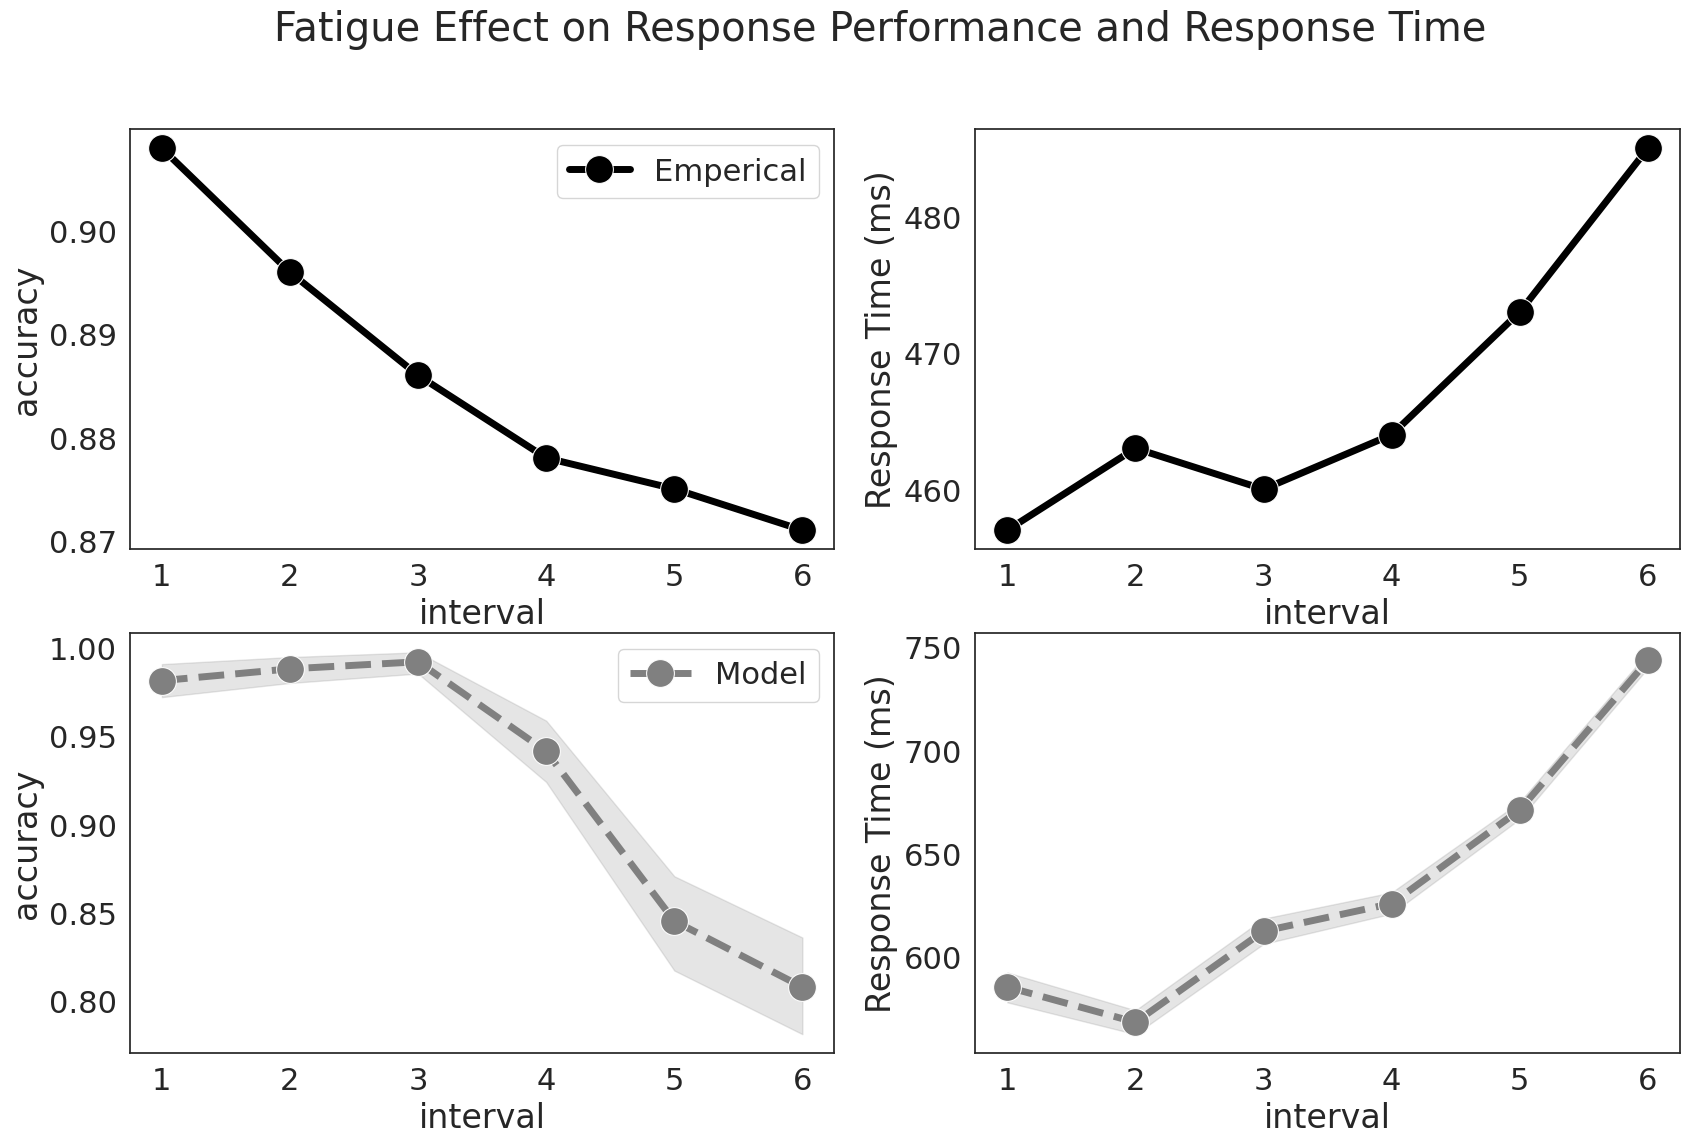

In [22]:
fig, axes = plt.subplots(2,2, figsize=(20, 12))
fig.suptitle('Fatigue Effect on Response Performance and Response Time')

sns.lineplot(data=df_bokesem_fatigue[df_bokesem_fatigue['interval']<7], x='interval', y='accuracy',  
             markersize=20, markers=True, marker='o', color='black', label='Emperical', ax=axes[0][0])
sns.lineplot(data=df_bokesem_fatigue[df_bokesem_fatigue['interval']<7], x='interval', y='response_time',  
             markersize=20, markers=True, marker='o', color='black', ax=axes[0][1])


sns.lineplot(data=df_model[df_model['interval']<7], x='interval', y='accuracy', 
             markersize=20, markers=True, marker='o', color='gray', linestyle='--', label='Model', ax=axes[1][0])
sns.lineplot(data=df_model[df_model['interval']<7], x='interval', y='response_time',  
             markersize=20, markers=True, marker='o', color='gray', linestyle='--', ax=axes[1][1])

axes[0][1].set_ylabel('Response Time (ms)')
axes[1][1].set_ylabel('Response Time (ms)')

plt.show()